In [1]:
print("Hello World!")

Hello World!


In [2]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image

In [4]:
# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

In [5]:
# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj


In [6]:
# Start GRASS Session
gj.init("data", "nc_spm_08_grass7", "user1")

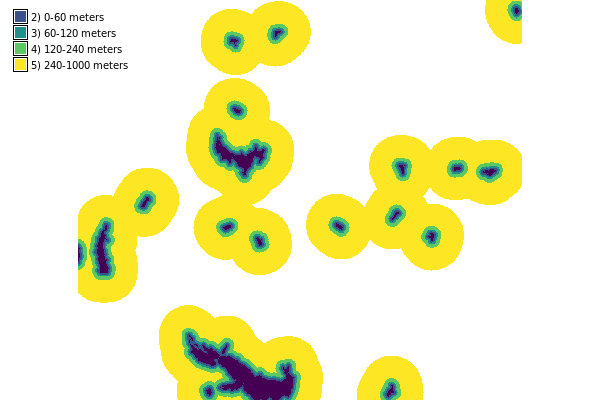

In [11]:
#Set computational region and create multiple buffers in given distances around lakes represented as raster

gs.parse_command("g.region", raster="lakes", flags="pg")
gs.run_command("r.buffer", input="lakes", output="lakes_buff", distances=[60, 120, 240, 1000])

# Start a GrassRenderer
img = gj.GrassRenderer()

# Add a raster and vector to the map
img.d_rast(map="lakes_buff")
img.d_legend(raster="lakes_buff", range=(2, 5), at=(80, 100, 2, 10))

# Display map
img.show()



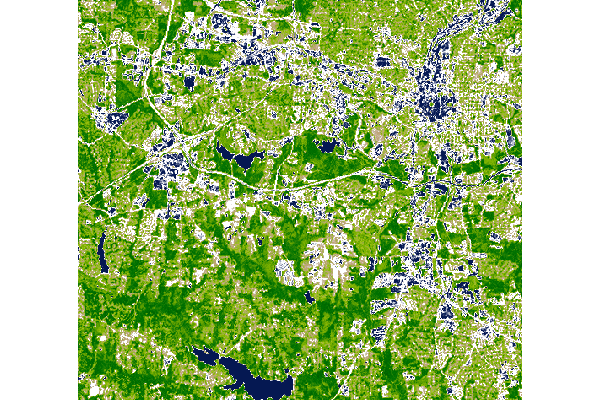

In [37]:
# Start a GrassRenderer map
# GrassRenderer makes non-interactive maps using a PNG image
img = gj.GrassRenderer()

#Calculate NDVI with map algebra

gs.mapcalc("ndvi1 = (lsat7_2002_40 - lsat7_2002_30) / (lsat7_2002_40 + lsat7_2002_30)")
gs.mapcalc("ndvi2 = 1.0 * (lsat7_2002_40 - lsat7_2002_30) / (lsat7_2002_40 + lsat7_2002_30)")
gs.mapcalc("ndvi3 = float(lsat7_2002_40 - lsat7_2002_30) / float(lsat7_2002_40 + lsat7_2002_30)")

#Set color schema 
gs.run_command("r.colors", map="ndvi3", color="ndvi")

# Add a raster, vector and legend to the map
img.d_rast(map="ndvi3")

# Display map
img.show() 

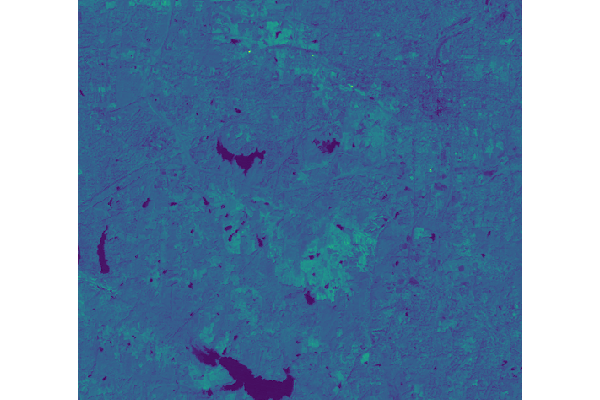

In [38]:
# Run time series analysis 

gs.run_command("r.series", input=["lsat5_1987_40", "lsat7_2000_40", "lsat7_2002_40"], output="lsat_TS_min", method="minimum")

# Set color schema
#gs.run_command("r.colors", map="NH_9908_min", rules="stddev_color.txt")


# Add output to the map
img.d_rast(map="lsat_TS_min")

# Display map
img.show() 